# Loading and Inspecting Climate Data

This notebook explores historic temperatures for the United States, broken down by month and year, from 1895-2020.

The dataset is available here: [Historical Climate Data](https://www.ncdc.noaa.gov/cag/national/time-series/110/tavg/all/1/1895-2020?base_prd=true&begbaseyear=1901&endbaseyear=2000)

In [3]:
# Load desired packages

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

In [4]:
# Load raw temp data 
atRaw = pd.read_csv('../rawData/tavg-1895-2020.csv')

In [5]:
# Inspect raw temp data
atRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1501 non-null   int64  
 1   Value    1501 non-null   float64
 2   Anomaly  1501 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 35.3 KB


In [6]:
# Let's take a look at the temp data table
atRaw.head()

,Date,Value,Anomaly
0,189501,26.69,-3.43
1,189502,26.60,-7.22
2,189503,39.97,-1.53
3,189504,52.90,1.85
4,189505,59.94,-0.26


In [7]:
atRaw.tail()

,Date,Value,Anomaly
1496,201909,68.43,3.57
1497,201910,52.05,-2.06
1498,201911,41.11,-0.58
1499,201912,36.43,3.75
1500,202001,35.53,5.41


In [34]:
# Load raw precipitation data 
apRaw = pd.read_csv('../rawData/pcp-1895-2020.csv')

In [35]:
# Inspect raw precip data
apRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1501 non-null   int64  
 1   Value    1501 non-null   float64
 2   Anomaly  1501 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 35.3 KB


In [36]:
# Let's take a look at the precip data table
apRaw.head()

,Date,Value,Anomaly
0,189501,3.32,1.01
1,189502,1.41,-0.72
2,189503,1.99,-0.52
3,189504,1.99,-0.53
4,189505,2.88,-0.03


In [37]:
apRaw.tail()

,Date,Value,Anomaly
1496,201909,2.45,-0.04
1497,201910,3.19,1.03
1498,201911,1.94,-0.29
1499,201912,2.57,0.22
1500,202001,2.75,0.44


## Temperature Data Cleaning

Since the Date series has the Year and Month concatenated. I would like to separate the two and create a new series for each.

In [8]:
# Inspect data types

atRaw.dtypes

Date         int64
Value      float64
Anomaly    float64
dtype: object

In [9]:
# Convert Date series to string in order to separate Year and Month

strDate = atRaw.Date.astype(str)

strDate

0       189501
1       189502
2       189503
3       189504
4       189505
         ...  
1496    201909
1497    201910
1498    201911
1499    201912
1500    202001
Name: Date, Length: 1501, dtype: object

In [11]:
# Write a loop to separate each year and month from the Date series

# Create empty arrays to hold the years and months once separated
month = []
year = []

# Loop through the Date series, pull out the year and month, convert to integer, then send to appropriate array
for i in strDate:
    year.append(int(i[0:4]))
    month.append(int(i[4:6]))

In [12]:
# Verify the loop worked

year

[1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,

In [13]:
# Verify the loop worked

month

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,

In [47]:
# Create a new series for Year, and a new series for Month

atRaw['Year'], atRaw['Month'] = (year, month)

atRaw

,Date,Value,Anomaly,Year,Month
0,189501,26.69,-3.43,1895,1
1,189502,26.60,-7.22,1895,2
2,189503,39.97,-1.53,1895,3
3,189504,52.90,1.85,1895,4
4,189505,59.94,-0.26,1895,5
...,...,...,...,...,...
1496,201909,68.43,3.57,2019,9
1497,201910,52.05,-2.06,2019,10
1498,201911,41.11,-0.58,2019,11
1499,201912,36.43,3.75,2019,12


In [15]:
# Now let's shorten the dataset to the last century weather data

# pull records for 1919 to present
weather = atRaw[atRaw.Year >= 1919]

# drop the single record for January 2020
centWeather = weather[weather.Year < 2020]

centWeather.tail()

,Date,Value,Anomaly,Year,Month
1495,201908,73.74,1.64,2019,8
1496,201909,68.43,3.57,2019,9
1497,201910,52.05,-2.06,2019,10
1498,201911,41.11,-0.58,2019,11
1499,201912,36.43,3.75,2019,12


In [16]:
# Creating subsets for each month
jan = centWeather[centWeather.Month == 1]

feb = centWeather[centWeather.Month == 2] 

mar = centWeather[centWeather.Month == 3]

apr = centWeather[centWeather.Month == 4]

may = centWeather[centWeather.Month == 5]

jun = centWeather[centWeather.Month == 6]

jul = centWeather[centWeather.Month == 7]

aug = centWeather[centWeather.Month == 8]

sep = centWeather[centWeather.Month == 9]

octb = centWeather[centWeather.Month == 10]

nov = centWeather[centWeather.Month == 11]

dec = centWeather[centWeather.Month == 12]

## Precipitation Data Cleaning

The precipitation date is in the same state as the temperature data. I'll separate Year and Month, creating new columns for each. Then I'll declare variables for visualizations.

In [38]:
# Inspect data types

apRaw.dtypes

Date         int64
Value      float64
Anomaly    float64
dtype: object

In [40]:
# Convert Date series to string in order to separate Year and Month

stringDate = apRaw.Date.astype(str)

stringDate

0       189501
1       189502
2       189503
3       189504
4       189505
         ...  
1496    201909
1497    201910
1498    201911
1499    201912
1500    202001
Name: Date, Length: 1501, dtype: object

In [41]:
# Write a loop to separate each year and month from the Date series

# Create empty arrays to hold the years and months once separated
prcpMonth = []
prcpYear = []

# Loop through the Date series, pull out the year and month, convert to integer, then send to appropriate array
for i in stringDate:
    prcpYear.append(int(i[0:4]))
    prcpMonth.append(int(i[4:6]))

In [42]:
# Verify the loop worked

prcpMonth, prcpYear

([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11

In [46]:
# Create a new series for Year, and a new series for Month

apRaw['Year'], apRaw['Month'] = (prcpYear, prcpMonth)

apRaw

,Date,Value,Anomaly,Year,Month
0,189501,3.32,1.01,1895,1
1,189502,1.41,-0.72,1895,2
2,189503,1.99,-0.52,1895,3
3,189504,1.99,-0.53,1895,4
4,189505,2.88,-0.03,1895,5
...,...,...,...,...,...
1496,201909,2.45,-0.04,2019,9
1497,201910,3.19,1.03,2019,10
1498,201911,1.94,-0.29,2019,11
1499,201912,2.57,0.22,2019,12


In [48]:
# Now let's shorten the dataset to the last century precipitation data

# pull records for 1919 to present
precip = apRaw[apRaw.Year >= 1919]

# drop the single record for January 2020
centPrecip = precip[precip.Year < 2020]

centPrecip.tail()

,Date,Value,Anomaly,Year,Month
1495,201908,2.78,0.16,2019,8
1496,201909,2.45,-0.04,2019,9
1497,201910,3.19,1.03,2019,10
1498,201911,1.94,-0.29,2019,11
1499,201912,2.57,0.22,2019,12


In [49]:
# Creating subsets for each month
janPrcp = centPrecip[centPrecip.Month == 1]

febPrcp = centPrecip[centPrecip.Month == 2] 

marPrcp = centPrecip[centPrecip.Month == 3]

aprPrcp = centPrecip[centPrecip.Month == 4]

mayPrcp = centPrecip[centPrecip.Month == 5]

junPrcp = centPrecip[centPrecip.Month == 6]

julPrcp = centPrecip[centPrecip.Month == 7]

augPrcp = centPrecip[centPrecip.Month == 8]

sepPrcp = centPrecip[centPrecip.Month == 9]

octbPrcp = centPrecip[centPrecip.Month == 10]

novPrcp = centPrecip[centPrecip.Month == 11]

decPrcp = centPrecip[centPrecip.Month == 12]

## Visualizing Temperature Trends

Now that the data is in a format we can work with, let's make some neat charts!

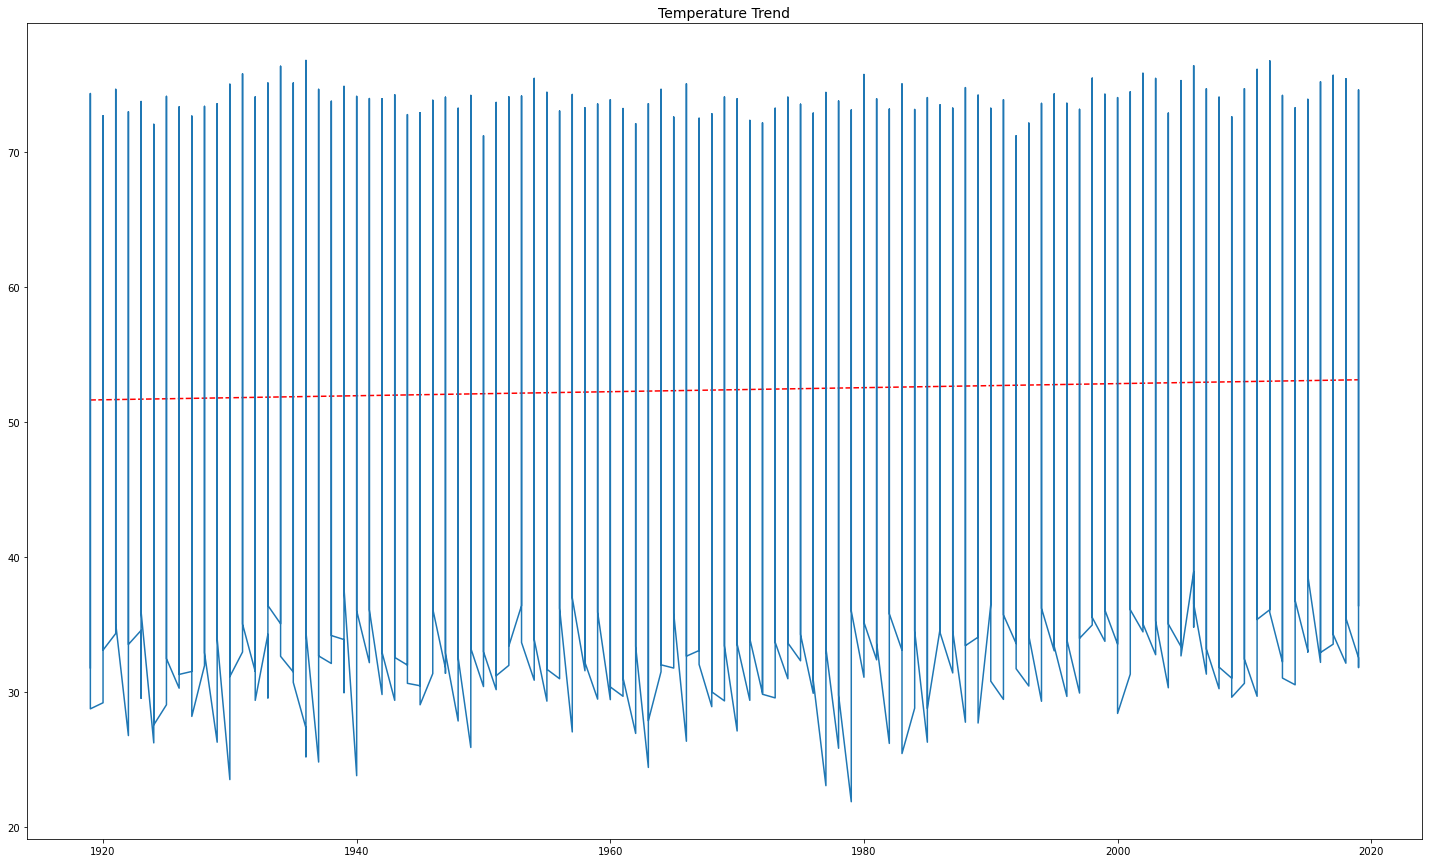

In [66]:
year = centWeather.Year
value = centWeather.Value
anomaly = centWeather.Anomaly

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(year, value, 1)
p = np.poly1d(z)
ax.plot(year,p(year),"r--")
ax.plot(year, value)
ax.set_title('Temperature Trend', fontsize=14);

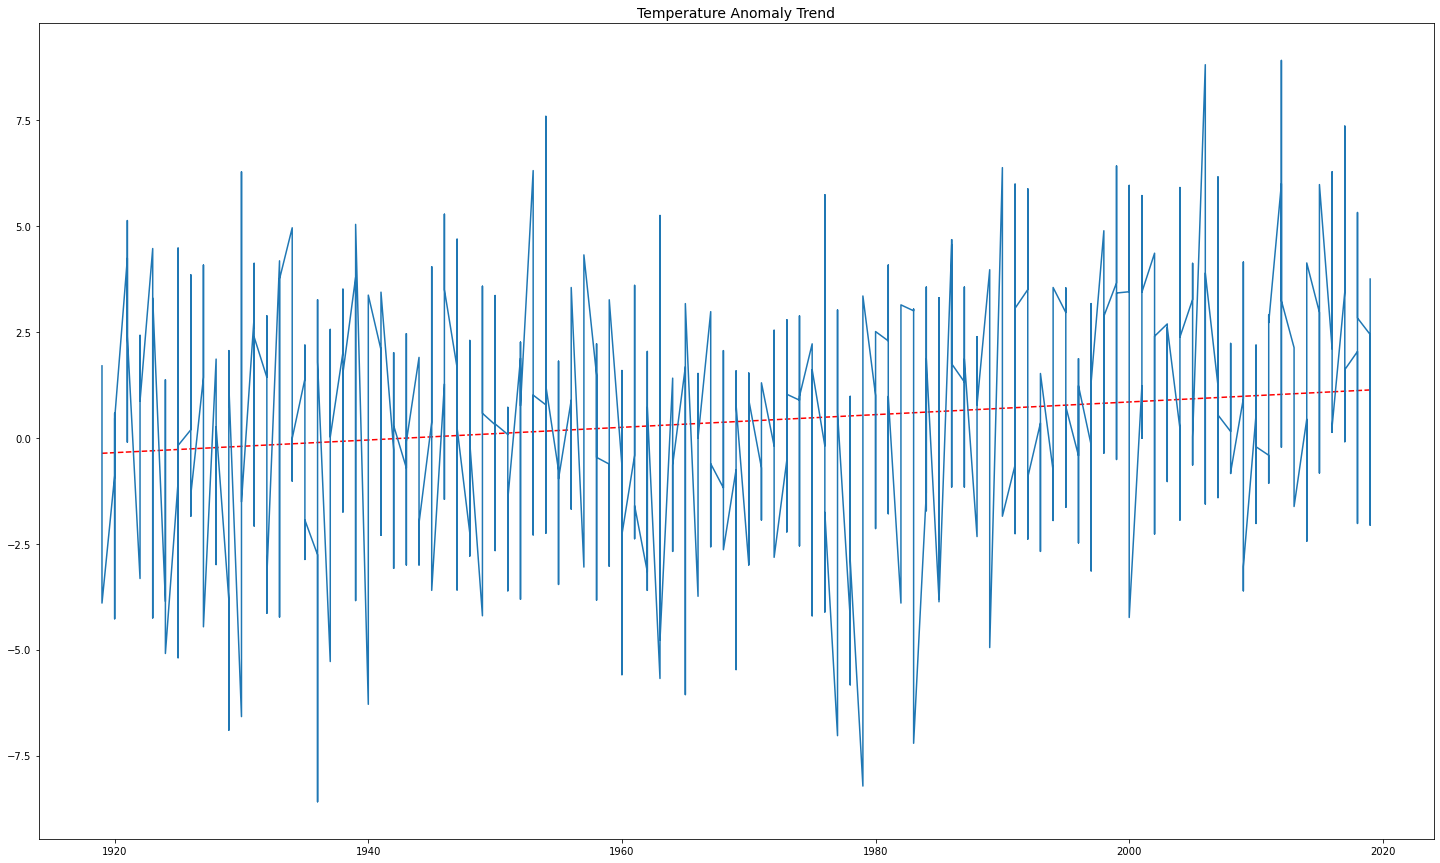

In [67]:
# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(year, anomaly, 1)
p = np.poly1d(z)
ax.plot(year,p(year),"r--")
ax.plot(year, anomaly)
ax.set_title('Temperature Anomaly Trend', fontsize=14);

## Wildfire Season Trends

In the wildfire notebook I explore wildfire trends. One significant observation is that the majority of wildfires take place between May and September. For that reason, the following in visualizations I will break down climate data by month for wildfire season.  

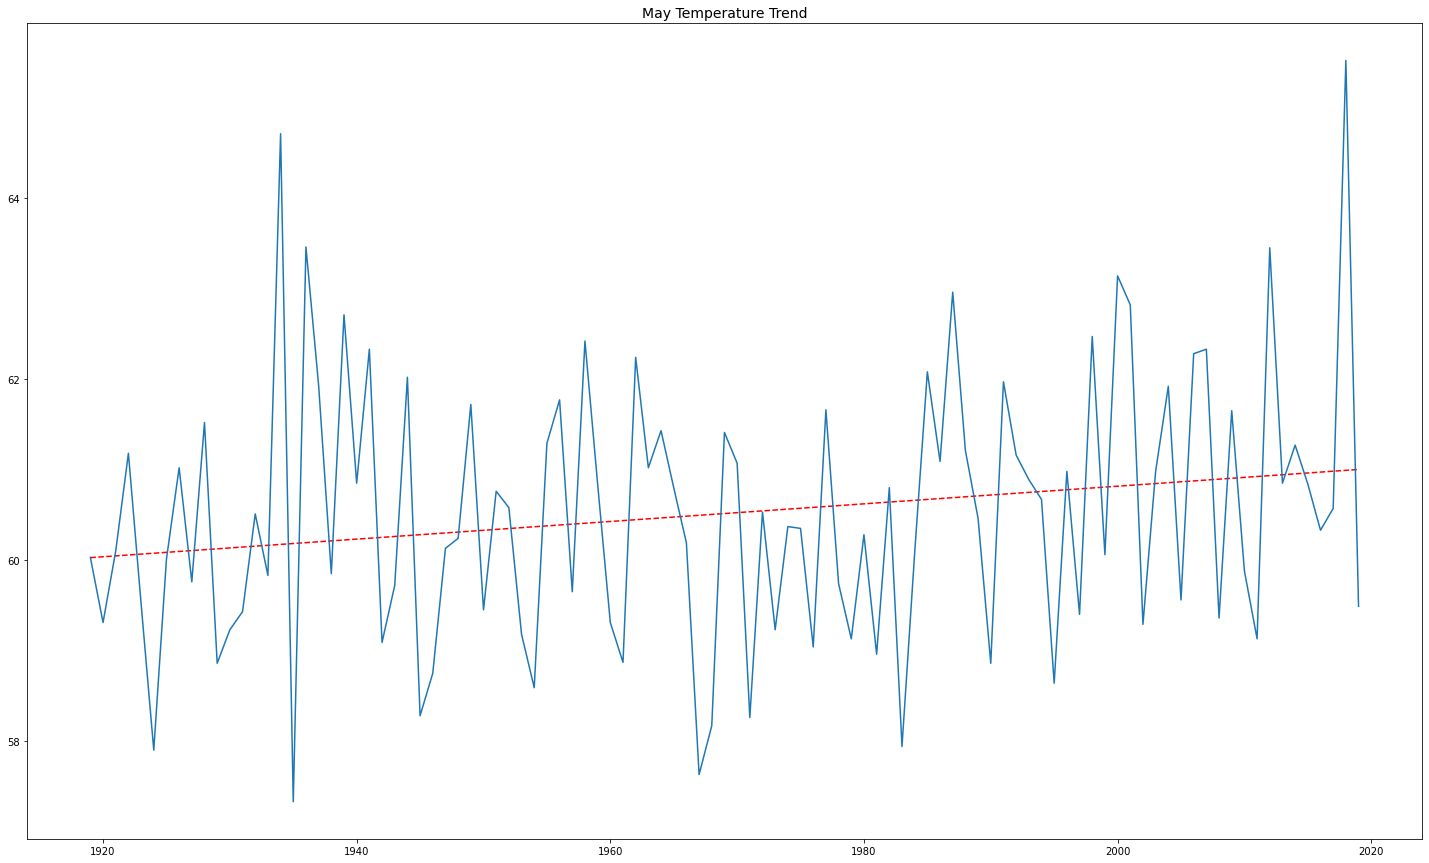

In [27]:
# Plotting May Temperature Trends 

mayTemp = may.Value
mayYear = may.Year

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(mayYear, mayTemp, 1)
p = np.poly1d(z)
ax.plot(mayYear,p(mayYear),"r--")
ax.plot(mayYear, mayTemp)
ax.set_title('May Temperature Trend', fontsize=14);

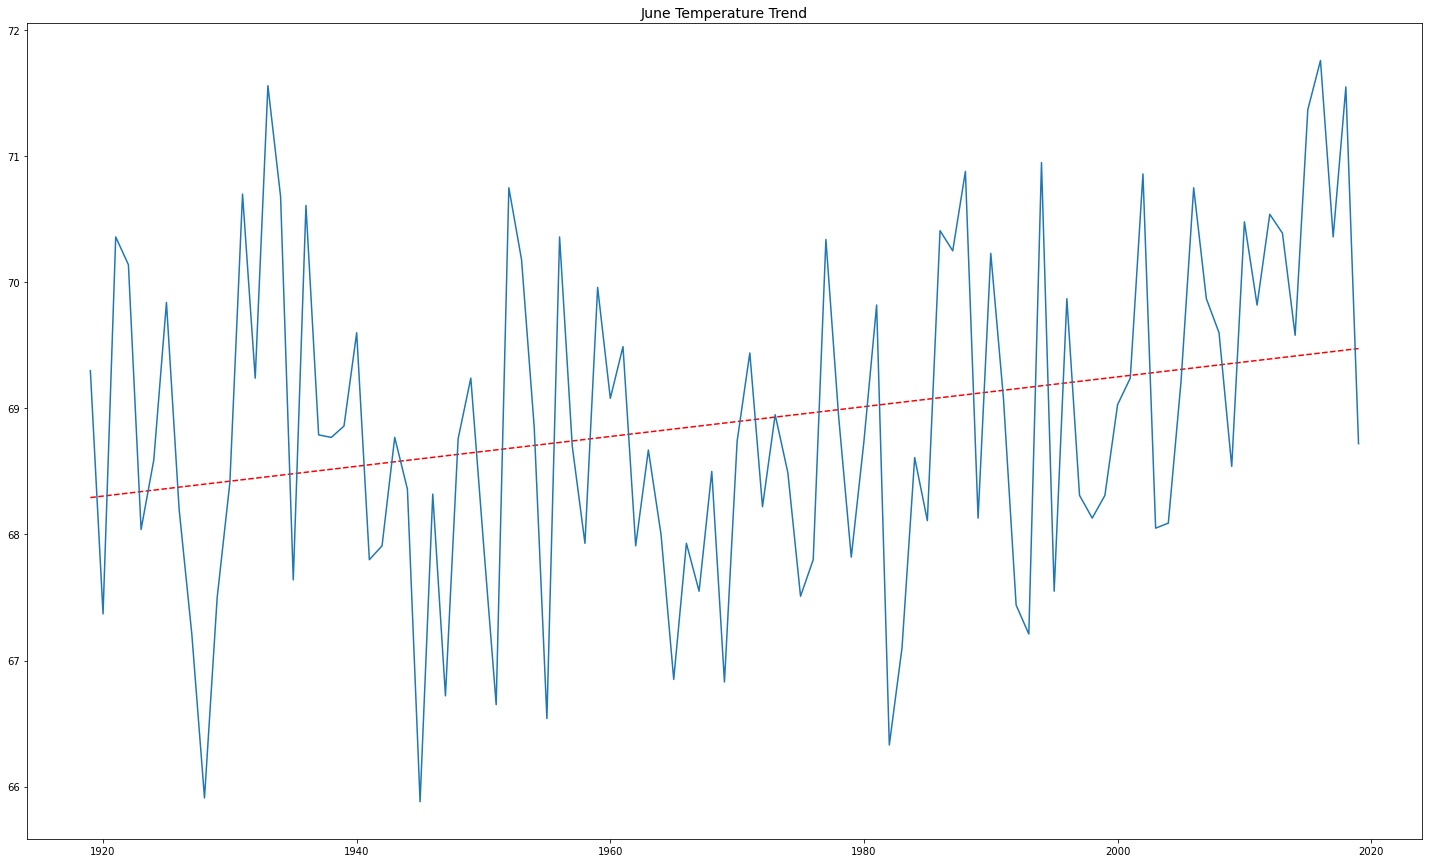

In [28]:
# Plotting June Temperature Trends 

junTemp = jun.Value
junYear = jun.Year

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(junYear, junTemp, 1)
p = np.poly1d(z)
ax.plot(junYear,p(junYear),"r--")
ax.plot(junYear, junTemp)
ax.set_title('June Temperature Trend', fontsize=14);

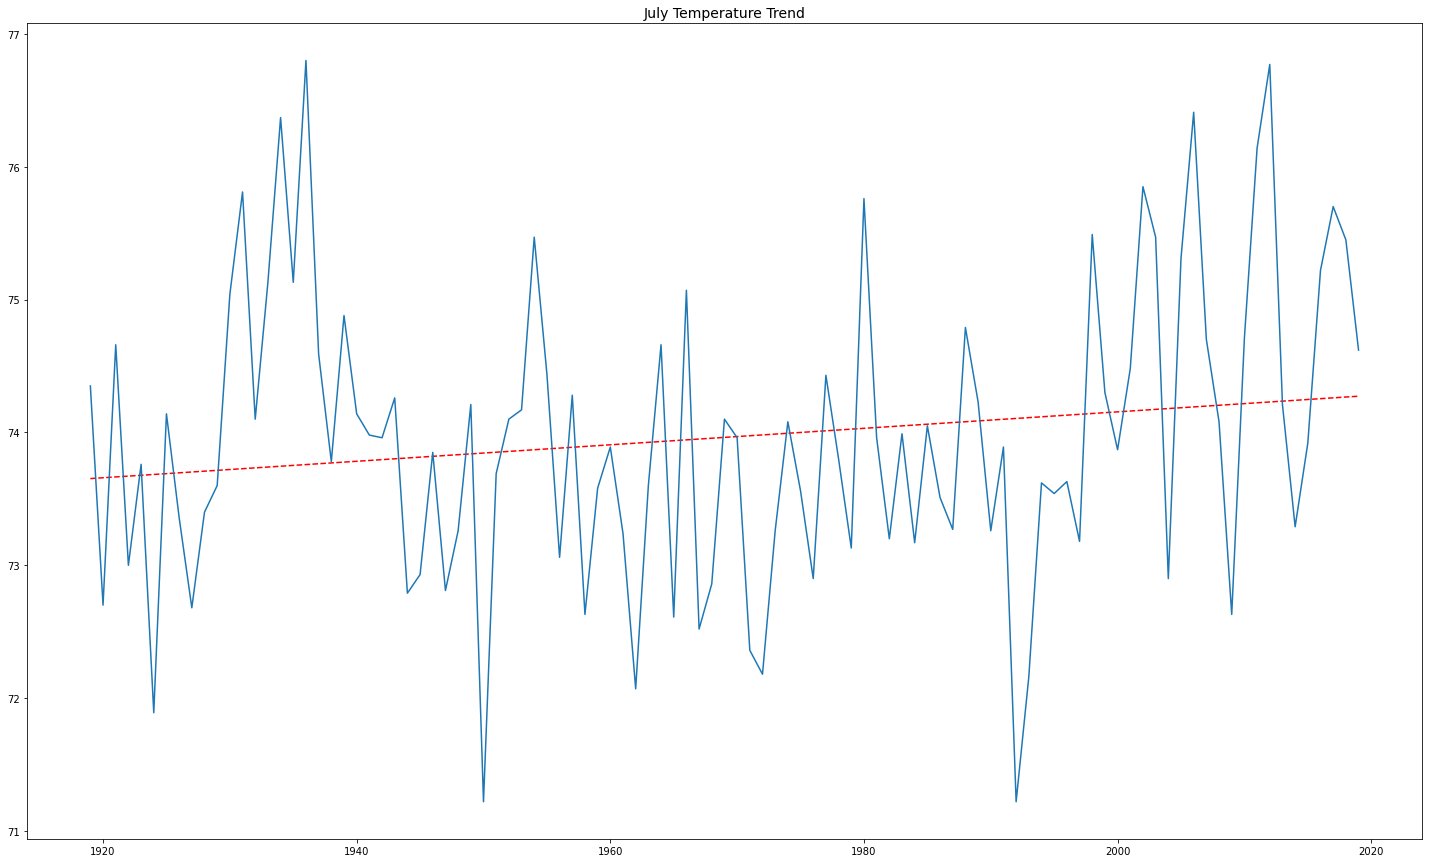

In [29]:
# Plotting July Temperature Trends 

julTemp = jul.Value
julYear = jul.Year

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(julYear, julTemp, 1)
p = np.poly1d(z)
ax.plot(julYear,p(julYear),"r--")
ax.plot(julYear, julTemp)
ax.set_title('July Temperature Trend', fontsize=14);

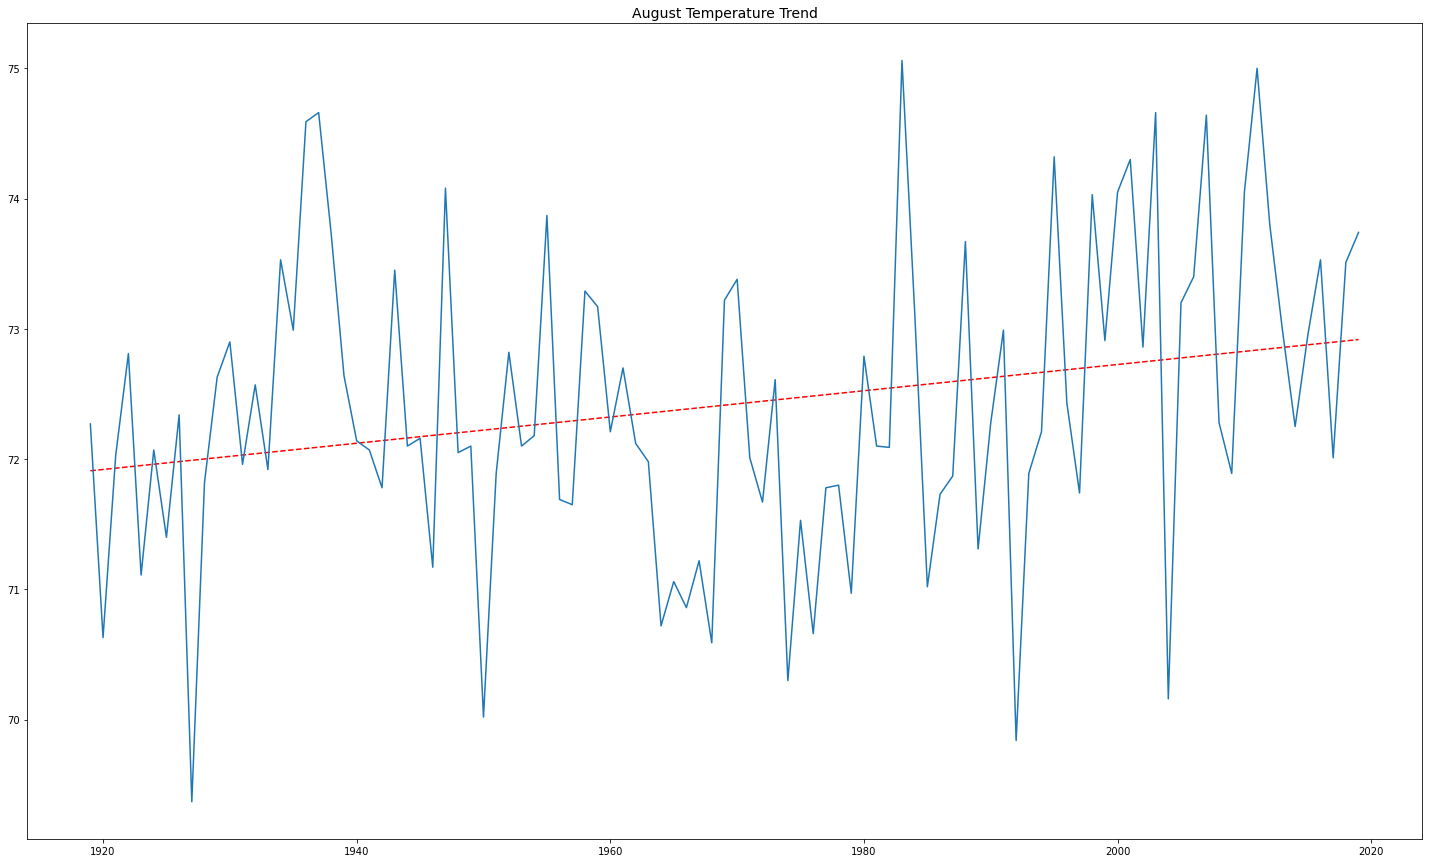

In [30]:
# Plotting August Temperature Trends 

augTemp = aug.Value
augYear = aug.Year

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(augYear, augTemp, 1)
p = np.poly1d(z)
ax.plot(augYear,p(augYear),"r--")
ax.plot(augYear, augTemp)
ax.set_title('August Temperature Trend', fontsize=14);

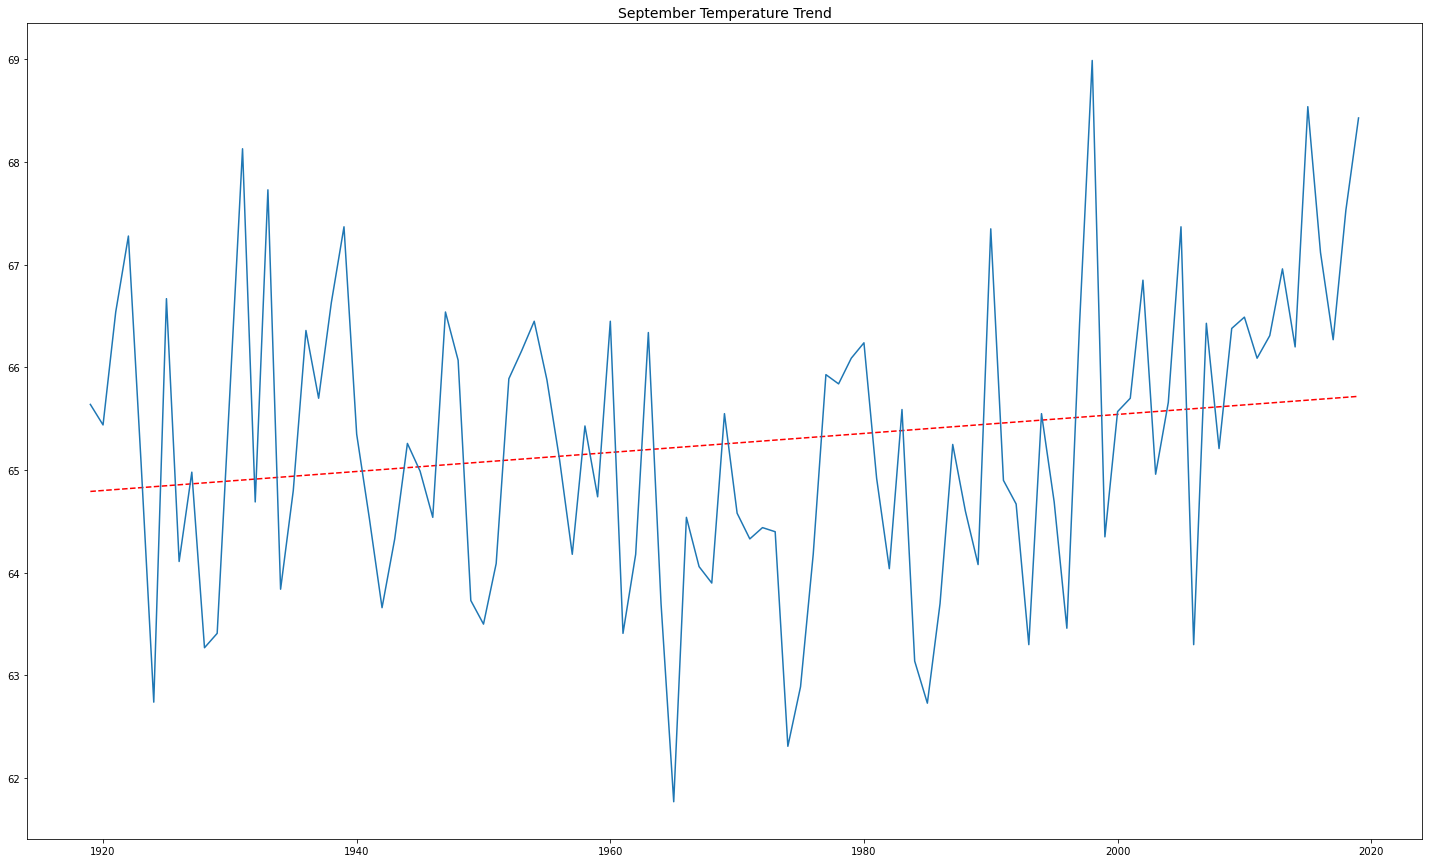

In [31]:
# Plotting September Temperature Trends 

sepTemp = sep.Value
sepYear = sep.Year

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(sepYear, sepTemp, 1)
p = np.poly1d(z)
ax.plot(sepYear,p(sepYear),"r--")
ax.plot(sepYear, sepTemp)
ax.set_title('September Temperature Trend', fontsize=14);